In [74]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
data = pd.read_csv('unpluggedNew.csv')
data.shape
data.sample(frac=1)
data = data[0:300]

In [64]:
gender = {'M': 1, 'F': 2}
data.Gender = [gender[item] for item in data.Gender]
result_before = {'P': 1, 'F': 0}
result_after = {'P': 1, 'F': 0}
data.Results_Before = [result_before[item] for item in data.Results_Before]
data.Results_After = [result_after[item] for item in data.Results_After]
data = data[['Age','Gender','Class','Results_Before','Results_After','Positive Outcomes']]
data.head()

,Age,Gender,Class,Results_Before,Results_After,Positive Outcomes
0,12,1,4,0,0,F
1,10,2,4,0,0,F
2,10,1,4,0,0,F
3,12,1,4,0,0,F
4,8,1,4,1,1,F


In [65]:
array = data.values
X = array[:,0:5]
y = array[:,5:]

In [66]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

In [67]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\a

In [70]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[32  0]
 [ 0 28]]


=== Classification Report ===
              precision    recall  f1-score   support

           F       1.00      1.00      1.00        32
           T       1.00      1.00      1.00        28

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


In [71]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 140, 'n_estimators': 1000, 'max_features': 'auto'}


In [72]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=100, max_features='auto')
rfc=rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-

=== Confusion Matrix ===
[[32  0]
 [ 0 28]]


=== Classification Report ===
              precision    recall  f1-score   support

           F       1.00      1.00      1.00        32
           T       1.00      1.00      1.00        28

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


AUC: 1.000


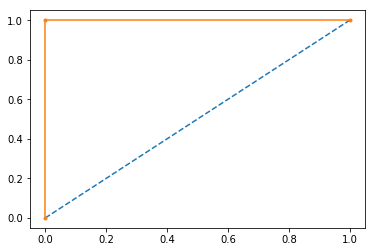

In [75]:
testy = []
probsy = []
probs = rfc_predict[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(y_test)):
    if (y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()